In [1]:
import numpy as np
import matplotlib.pyplot as plt

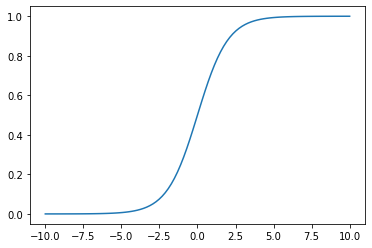

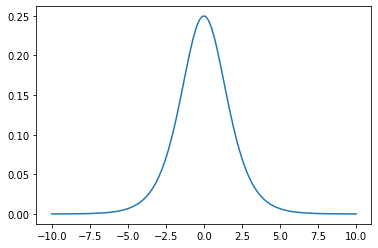

In [2]:
# sigmoid activation function and its derivative
sigmoid = lambda x: 1/(1 + np.exp(-x))
sigmoidprime = lambda x: sigmoid(x) * (1 - sigmoid(x))

# plot the functions
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()
plt.plot(x, sigmoidprime(x))
plt.show()

In [3]:
# input array
logic_data = np.array([[0,0], [0,1], [1,0], [1,1]])

def pick_operand(operand):
    if operand == "and":
        # labels for AND
        labels = np.array([0, 0, 0, 1])
    elif operand == "or":
        # labels for OR
        labels = np.array([0, 1, 1, 1])
    elif operand == "nor":
        # labels for not OR
        labels = np.array([1, 0, 0, 0])
    elif operand == "nand":
        # labels for not AND
        labels = np.array([1, 1, 1, 0])
    elif operand == "xor":
        # labels for XOR
        labels = np.array([0, 1, 1, 0])
    else: raise ValueError("please specify an opperand as either: and, or, nor, nand, xor")
    return labels

In [4]:
# class Perceptron
class Perceptron:
    """Single Perceptron"""
    
    def __init__(self, input_units, alpha=1):
        """Initialize perceptron with random weights and a bias. There should
        be one weight for each input unit + one bias, set the learning rate alpha (default 1)."""
        self.input_units = input_units
        # set the bias as additional random weight
        self.weights = np.random.normal(size= input_units +1)
        self.alpha = alpha
        #initialize global variables for inputs and drive
        self.inputs = 0
        self.drive = 0
    
    
    def forward_step(self, inputs):
        """Calculate and return the activation of the Perceptron. Use sigmoid as activation function."""
        act_func = sigmoid
        # add a 1 to be multiplied with bias (our first weight)
        self.inputs = np.insert(inputs,0,1)
        
        #dot product
        dot_pro = self.inputs @ self.weights
        self.drive = dot_pro
        activation = act_func(dot_pro)
      
        return activation
    
    
    def update(self, delta):
        """Update the weights and the bias of the Perceptron with error term delta."""
        # partial derivative matrix = error signal * activation origin neuron
        gradients = delta * self.inputs
        # update the weights by substracting the old weights by learning rate times the partial derivatives
        self.weights -= self.alpha * gradients

In [5]:
# class Multilayer Perceptron
class MLP:
    """Multilayer Perceptron: Network of single Perceptrons"""
    
    def __init__(self):
        """Initialize MLP with one hidden layer (4 neurons) and one output neuron."""
        self.y_hat = 0

        # hidden layer neurons get two inputs each
        self.hidden_layer = [Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)]
        
        # output neuron gets four inputs
        self.output_layer = Perceptron(4)
    
    def forward_step(self, data):
        """Perform the forward propagation step of the inputs."""
        
        hidden_layer_output = []
        for perceptron in self.hidden_layer:
            output = perceptron.forward_step(data)
            hidden_layer_output.append(output) 
            
        hidden_layer_output = np.reshape(hidden_layer_output, newshape = (-1))         
        y_hat = self.output_layer.forward_step(hidden_layer_output)
        self.y_hat = y_hat
        
        return y_hat
        
    def backprop_step(self, target):
        """Perform the backpropagation step."""       
        delta_output = -(target - self.y_hat) * sigmoidprime(self.output_layer.drive)
             
        for i, perceptron in enumerate(self.hidden_layer):
            delta_hidden = delta_output * self.output_layer.weights[i+1] * sigmoidprime(perceptron.drive) 
            perceptron.update(delta_hidden)
        
        self.output_layer.update(delta_output)
                       
       
        

In [7]:
#test functionality
our_mlp = MLP()
our_mlp.forward_step(logic_data[2])
our_mlp.backprop_step(pick_operand('or')[2])

In [8]:
def accuracy_measure(target, guess):
    if target == 1:
        return guess > 0.5
    else:
        return guess <= 0.5          

In [9]:
# Training

#specify number of training epochs
epochs = 1000
epoch_loss = []
training_loss = []
epoch_accuracy = []
training_accuracy = []

# pick operand you want the MLP to learn ("and", "or", "nand", "nor", or "xor")
label = pick_operand("nor")

my_mlp = MLP()
for epoch in range(epochs):
    for i in range(4):    
        sigmoid_output = my_mlp.forward_step(logic_data[i])
        loss = (label[i]- sigmoid_output)**2
        training_loss.append(loss)
        my_mlp.backprop_step(label[i])
        training_accuracy.append(int(accuracy_measure(label[i],sigmoid_output)))
    
    epoch_loss.append(np.mean(training_loss))
    epoch_accuracy.append(np.mean(training_accuracy))       

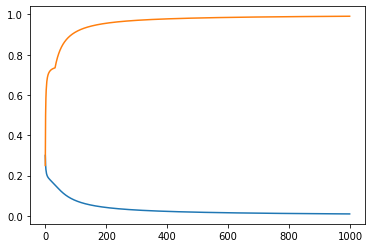

In [10]:
#Visualization
# plot the functions
x = np.arange(1000)
plt.plot(x, epoch_loss)
plt.plot(x,epoch_accuracy)
plt.show()